# Apache Spark IPL Data Analysis Project

---

### Spark Environment Details

- **SparkSession - hive**
- **SparkContext**
- **Spark UI**: [Link to Spark UI](https://github.com/darshilparmar/ipl-data-analysis-apache-spark-project/blob/0a24b129268f5bf52696b5b5578d20e201041a86//?o=4564536744039490#setting/sparkui/0417-061547-zk0uv8qh/driver-6114070414821599618)
- **Version:** `v3.3.2`
- **Master:** `local[8]`
- **AppName:** `Databricks Shell`

---

### Importing Required Libraries




---

### Creating Spark Session



In [0]:
spark

In [0]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, BooleanType, DataType, DecimalType
from pyspark.sql.functions import *
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName("IPL_Data_Analysis").getOrCreate()

In [0]:
spark

In [0]:
ball_by_ball_df = spark.read.format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
print(ball_by_ball_df.columns)


---

### Schemas Definition for DataFrames



In [0]:
ball_by_ball_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
ball_by_ball_df.printSchema()

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, DateType, BooleanType

ball_by_ball_schema = StructType([
    StructField("Match_id", IntegerType(), True),
    StructField("Over_id", IntegerType(), True),
    StructField("Ball_id", IntegerType(), True),
    StructField("Innings_No", IntegerType(), True),
    StructField("Team_Batting", StringType(), True),
    StructField("Team_Bowling", StringType(), True),
    StructField("Striker_Batting_Position", IntegerType(), True),
    StructField("Extra_Type", StringType(), True),
    StructField("Runs_Scored", IntegerType(), True),
    StructField("Extra_runs", IntegerType(), True),
    StructField("Wides", IntegerType(), True),
    StructField("Legbyes", IntegerType(), True),
    StructField("Byes", IntegerType(), True),
    StructField("Noballs", IntegerType(), True),
    StructField("Penalty", IntegerType(), True),
    StructField("Bowler_Extras", IntegerType(), True),
    StructField("Out_type", StringType(), True),
    StructField("Caught", BooleanType(), True),
    StructField("Bowled", BooleanType(), True),
    StructField("Run_out", BooleanType(), True),
    StructField("LBW", BooleanType(), True),
    StructField("Retired_hurt", BooleanType(), True),
    StructField("Stumped", BooleanType(), True),
    StructField("Caught_and_Bowled", BooleanType(), True),
    StructField("Hit_Wicket", BooleanType(), True),
    StructField("ObstructingField", BooleanType(), True),
    StructField("Bowler_Wicket", BooleanType(), True),
    StructField("Match_Date", DateType(), True),
    StructField("Season", IntegerType(), True),
    StructField("Striker", StringType(), True),
    StructField("Non_Striker", StringType(), True),
    StructField("Bowler", StringType(), True),
    StructField("Player_Out", StringType(), True),
    StructField("Fielders", StringType(), True),
    StructField("Striker_match_SK", IntegerType(), True),
    StructField("Striker_SK", IntegerType(), True),
    StructField("NonStriker_match_SK", IntegerType(), True),
    StructField("NonStriker_SK", IntegerType(), True),
    StructField("Fielder_match_SK", IntegerType(), True),
    StructField("Fielder_SK", IntegerType(), True),
    StructField("Bowler_match_SK", IntegerType(), True),
    StructField("Bowler_SK", IntegerType(), True),
    StructField("PlayerOut_match_SK", IntegerType(), True),
    StructField("BattingTeam_SK", IntegerType(), True),
    StructField("BowlingTeam_SK", IntegerType(), True),
    StructField("Keeper_Catch", BooleanType(), True),
    StructField("Player_Out_SK", IntegerType(), True),
    StructField("MatchDateSK", IntegerType(), True)
])

ball_by_ball_df = spark.read.format("csv").option("header", "true").schema(ball_by_ball_schema).load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
ball_by_ball_df.printSchema()

In [0]:
ball_by_ball_df.show(5)

In [0]:
match_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Match.csv")
match_df.printSchema()

In [0]:
match_schema = StructType([
    StructField("Match_SK", IntegerType(), True),
    StructField("match_id", IntegerType(), True)    ,
    StructField("Team1", StringType(), True),
    StructField("Team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("Season_Year", IntegerType(), True),
    StructField("Venue_Name", StringType(), True),
    StructField("City_Name", StringType(), True) ,
    StructField("Country_Name", StringType(), True),
    StructField("Toss_Winner", StringType(), True)  ,
    StructField("match_winner", StringType(), True),
    StructField("Toss_Name", StringType(), True),
    StructField("Win_Type", StringType(), True),
    StructField("Outcome_Type", StringType(), True),
    StructField("ManOfMach", StringType(), True),
    StructField("Win_Margin", StringType(), True),
    StructField("Country_id", IntegerType(), True)
])  
match_df = spark.read.format("csv").option("header", "true").schema(match_schema).load("s3://ipl-data-analysis-project/Match.csv")
match_df.printSchema()
match_df.show(5)

In [0]:
Player_match_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Player_match.csv")
Player_match_df.printSchema()
Player_match_df.show(5)

In [0]:
Player_match_schema = StructType([
    StructField("Player_match_SK", IntegerType(), True),
    StructField("PlayerMatch_key", DoubleType(), True),
    StructField("Match_Id", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", DateType(), True),
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Role_Desc", StringType(), True),
    StructField("Player_team", StringType(), True),
    StructField("Opposit_Team", StringType(), True),
    StructField("Season_year", IntegerType(), True),
    StructField("is_manofThematch", IntegerType(), True),
    StructField("Age_As_on_match", IntegerType(), True),
    StructField("IsPlayers_Team_won", IntegerType(), True),
    StructField("Batting_Status", StringType(), True),
    StructField("Bowling_Status", StringType(), True),
    StructField("Player_Captain", StringType(), True),
    StructField("Opposit_captain", StringType(), True),
    StructField("Player_keeper", StringType(), True),
    StructField("Opposit_keeper", StringType(), True)
])
Player_match_df = spark.read.format("csv").option("header", "true").schema(Player_match_schema).load("s3://ipl-data-analysis-project/Player_match.csv")
Player_match_df.printSchema()
Player_match_df.show(5)

In [0]:
Player_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Player.csv")
Player_df.printSchema()
Player_df.show(5)

In [0]:
Player_schema = StructType([
    StructField("PLAYER_SK", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True)    ,
    StructField("Player_Name", StringType(), True),
    StructField("DOB", DateType(), True),
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True)
])  
Player_df = spark.read.format("csv").option("header", "true").schema(Player_schema).load("s3://ipl-data-analysis-project/Player.csv")
Player_df.printSchema()
Player_df.show(5)

In [0]:
Team_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Team.csv")
Team_df.printSchema()
Team_df.show(5)

In [0]:
Team_schema = StructType([
    StructField("Team_SK", IntegerType(), True),
    StructField("Team_Id", IntegerType(), True),
    StructField("Team_Name", StringType(), True)
])  
Team_df = spark.read.format("csv").option("header", "true").schema(Team_schema).load("s3://ipl-data-analysis-project/Team.csv")
Team_df.printSchema()
Team_df.show(5)

### Data Cleaning and Transformation Examples



In [0]:
# exclude wides and no balls

ball_by_ball_df = ball_by_ball_df.filter((ball_by_ball_df['Wides'] == 0) & (ball_by_ball_df['Noballs'] == 0))

In [0]:
# Aggregation - Total and Average Run scored in each match and inning

total_and_avg_runs = ball_by_ball_df.groupBy('Match_id', 'Innings_No').agg(sum('Runs_Scored').alias('Total_Runs'),  avg('Runs_Scored').alias('Avg_Runs'))         
total_and_avg_runs.show(5)

In [0]:
# Window Function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
from pyspark.sql.functions import (
    year,
    month,
    dayofmonth,
    when,
    col,
    expr
)

match_df = match_df.withColumn(
    "year",
    year("match_date")
)
match_df = match_df.withColumn(
    "month",
    month("match_date")
)
match_df = match_df.withColumn(
    "day",
    dayofmonth("match_date")
)
match_df = match_df.withColumn(
    "win_margin_num",
    expr("try_cast(win_margin AS BIGINT)")
)
match_df = match_df.withColumn(
    "win_margin_category",
    when(
        col("win_margin_num") >= 100,
        "High"
    ).when(
        (col("win_margin_num") >= 50) & (col("win_margin_num") < 100),
        "Medium"
    ).otherwise("Low")
)
match_df = match_df.withColumn(
    "toss_match_winner",
    when(
        col("toss_winner") == col("match_winner"),
        "Yes"
    ).otherwise("No")
)

display(match_df)

Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id,year,month,day,win_margin_num,win_margin_category,toss_match_winner
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,null,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1,null,null,null,140,High,No
1,335988,Kings XI Punjab,Chennai Super Kings,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1,null,null,null,33,Low,Yes
2,335989,Delhi Daredevils,Rajasthan Royals,null,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1,null,null,null,9,Low,No
3,335990,Mumbai Indians,Royal Challengers Bangalore,null,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1,null,null,null,5,Low,No
4,335991,Kolkata Knight Riders,Deccan Chargers,null,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1,null,null,null,5,Low,No
5,335992,Rajasthan Royals,Kings XI Punjab,null,2008,Sawai Mansingh Stadium,Jaipur,India,Kings XI Punjab,Rajasthan Royals,bat,wickets,Result,SR Watson,6,1,null,null,null,6,Low,No
6,335993,Deccan Chargers,Delhi Daredevils,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Deccan Chargers,Delhi Daredevils,bat,wickets,Result,V Sehwag,9,1,null,null,null,9,Low,No
7,335994,Chennai Super Kings,Mumbai Indians,null,2008,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Chennai Super Kings,field,runs,Result,ML Hayden,6,1,null,null,null,6,Low,No
8,335995,Deccan Chargers,Rajasthan Royals,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Rajasthan Royals,Rajasthan Royals,field,wickets,Result,YK Pathan,3,1,null,null,null,3,Low,Yes
9,335996,Kings XI Punjab,Mumbai Indians,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Mumbai Indians,Kings XI Punjab,field,runs,Result,KC Sangakkara,66,1,null,null,null,66,Medium,No


In [0]:
from pyspark.sql.functions import (
    year,
    month,
    dayofmonth,
    when,
    col,
    expr
)

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(
        expr("try_cast(win_margin AS BIGINT) >= 100"),
        "High"
    ).when(
        (expr("try_cast(win_margin AS BIGINT) >= 50") & expr("try_cast(win_margin AS BIGINT) < 100")),
        "Medium"
    ).otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

display(match_df)

Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id,year,month,day,win_margin_num,win_margin_category,toss_match_winner
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,null,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1,null,null,null,140,High,No
1,335988,Kings XI Punjab,Chennai Super Kings,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1,null,null,null,33,Low,Yes
2,335989,Delhi Daredevils,Rajasthan Royals,null,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1,null,null,null,9,Low,No
3,335990,Mumbai Indians,Royal Challengers Bangalore,null,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1,null,null,null,5,Low,No
4,335991,Kolkata Knight Riders,Deccan Chargers,null,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1,null,null,null,5,Low,No
5,335992,Rajasthan Royals,Kings XI Punjab,null,2008,Sawai Mansingh Stadium,Jaipur,India,Kings XI Punjab,Rajasthan Royals,bat,wickets,Result,SR Watson,6,1,null,null,null,6,Low,No
6,335993,Deccan Chargers,Delhi Daredevils,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Deccan Chargers,Delhi Daredevils,bat,wickets,Result,V Sehwag,9,1,null,null,null,9,Low,No
7,335994,Chennai Super Kings,Mumbai Indians,null,2008,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Chennai Super Kings,field,runs,Result,ML Hayden,6,1,null,null,null,6,Low,No
8,335995,Deccan Chargers,Rajasthan Royals,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Rajasthan Royals,Rajasthan Royals,field,wickets,Result,YK Pathan,3,1,null,null,null,3,Low,Yes
9,335996,Kings XI Punjab,Mumbai Indians,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Mumbai Indians,Kings XI Punjab,field,runs,Result,KC Sangakkara,66,1,null,null,null,66,Medium,No


In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = Player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
Player_match_df = Player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
Player_match_df.show()


---

### Register Temp Views for SQL Queries



In [0]:
ball_by_ball_df = ball_by_ball_df.withColumn(
    "bowler_wicket",
    col("bowler_wicket").cast("int")
)
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
Player_df.createOrReplaceTempView("player")
Player_match_df.createOrReplaceTempView("player_match")
Team_df.createOrReplaceTempView("team")

In [0]:
# Top Scoring Batsmen per Season

top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC

""")

In [0]:
top_scoring_batsmen_per_season.show(30)

In [0]:
# Economical Bowlers in Powerplay

economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

In [0]:
# Toss Impact on Individual Matches

toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

In [0]:
# Average Runs in Wins

average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()

## Data Visulization

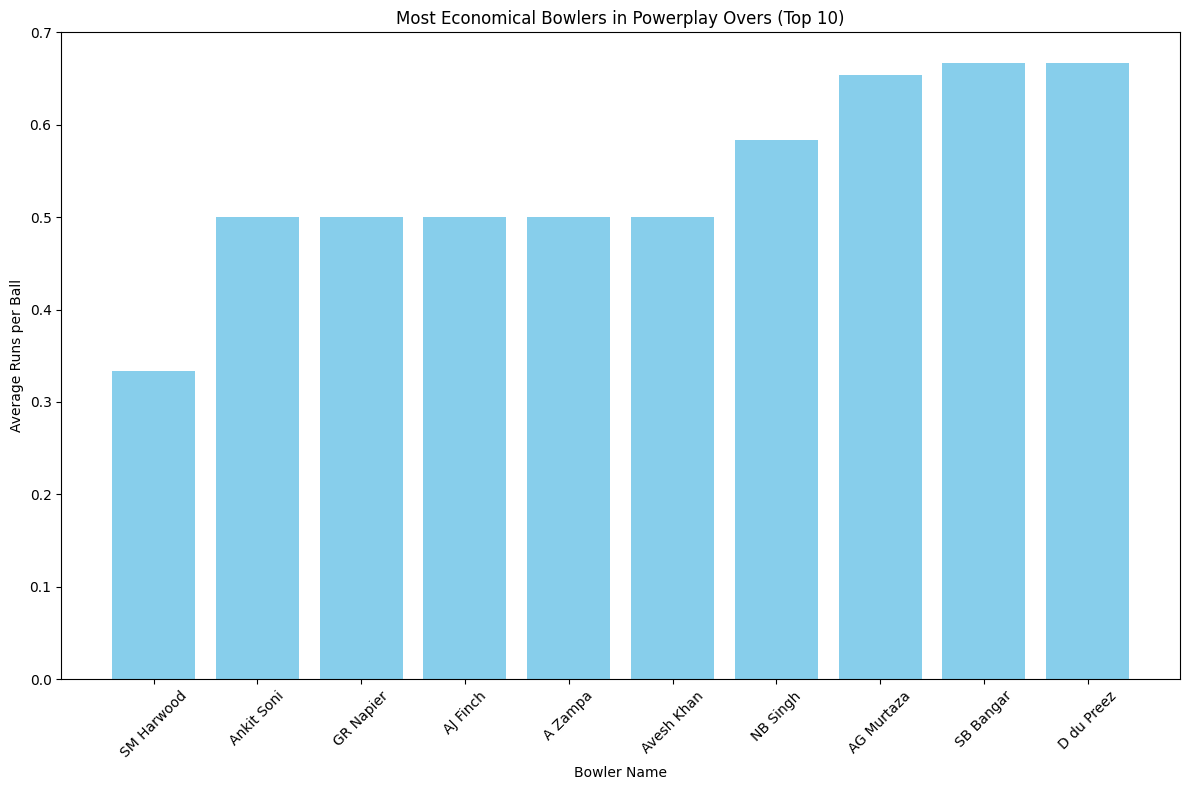

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

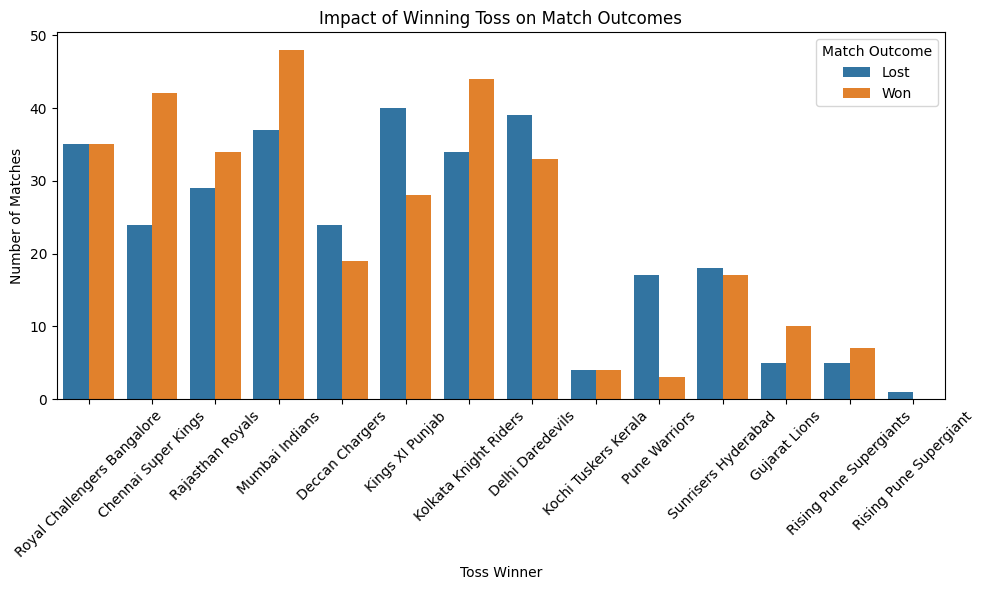

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

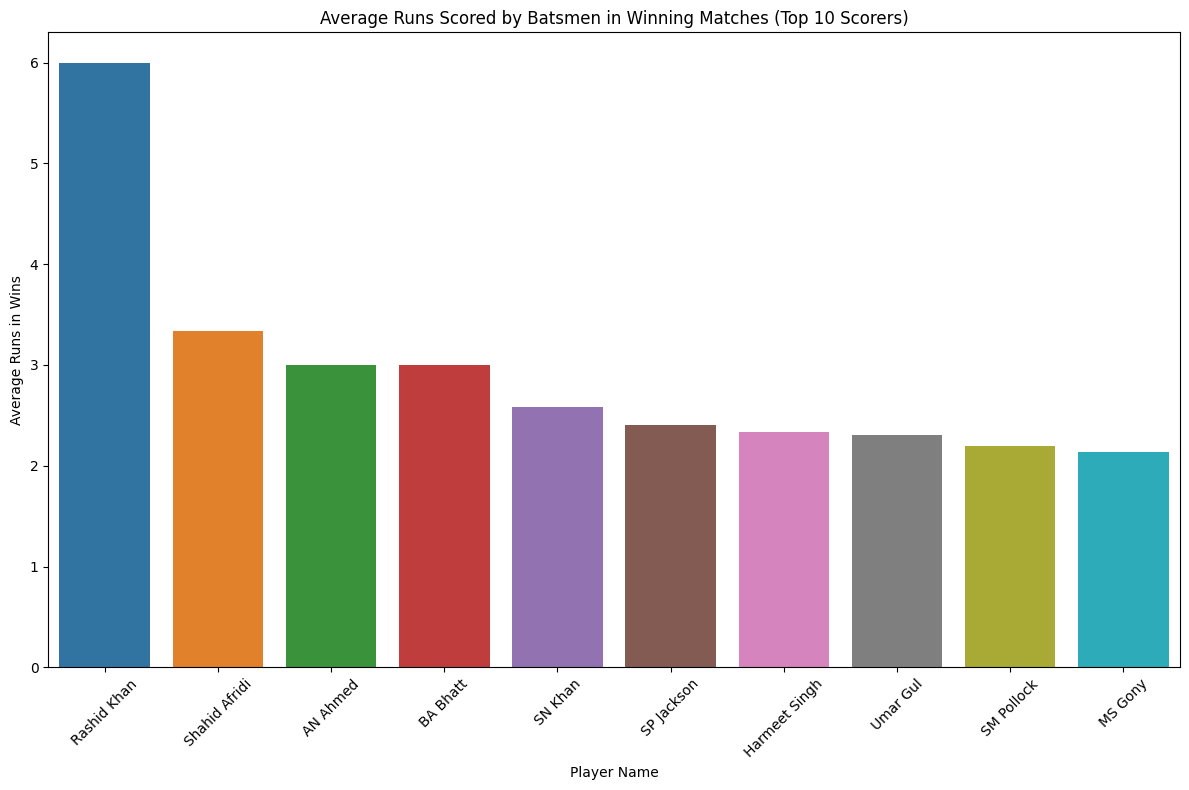

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

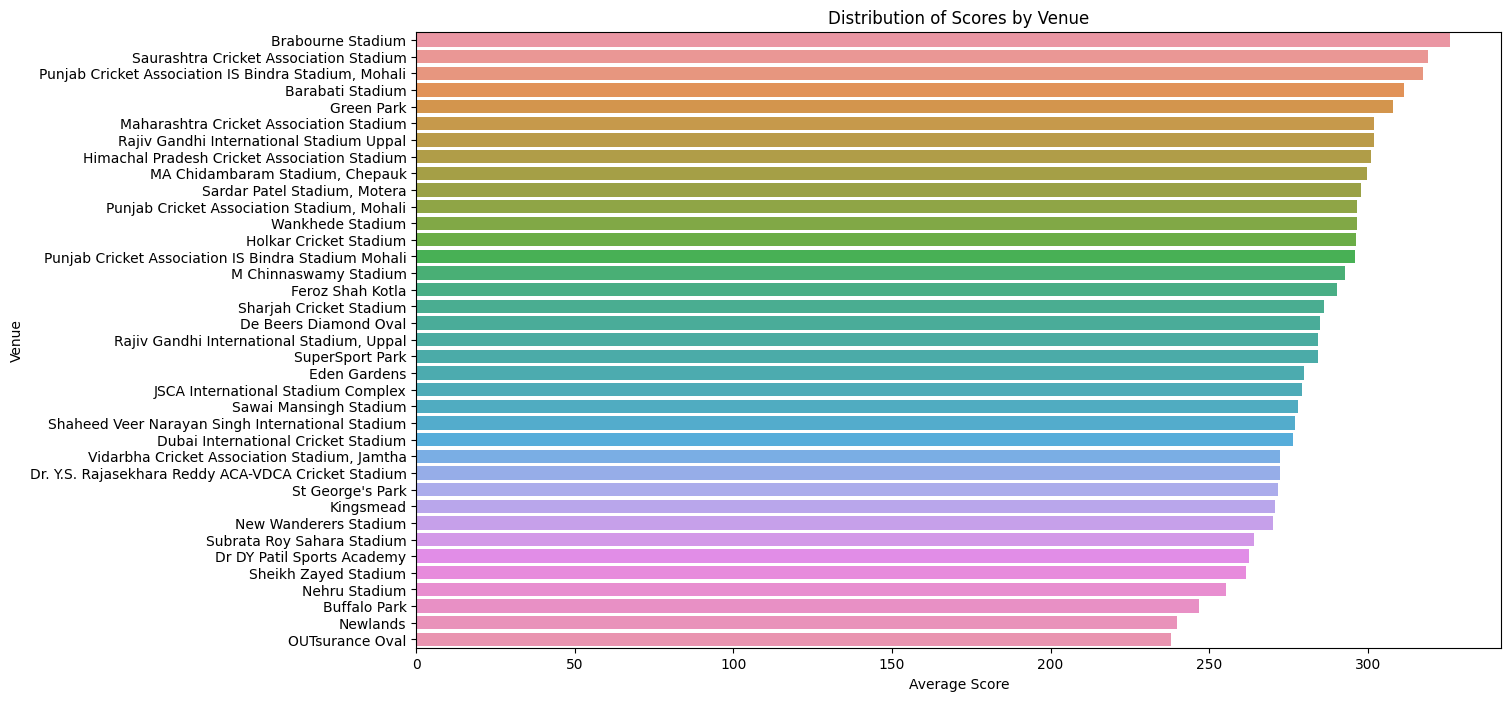

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

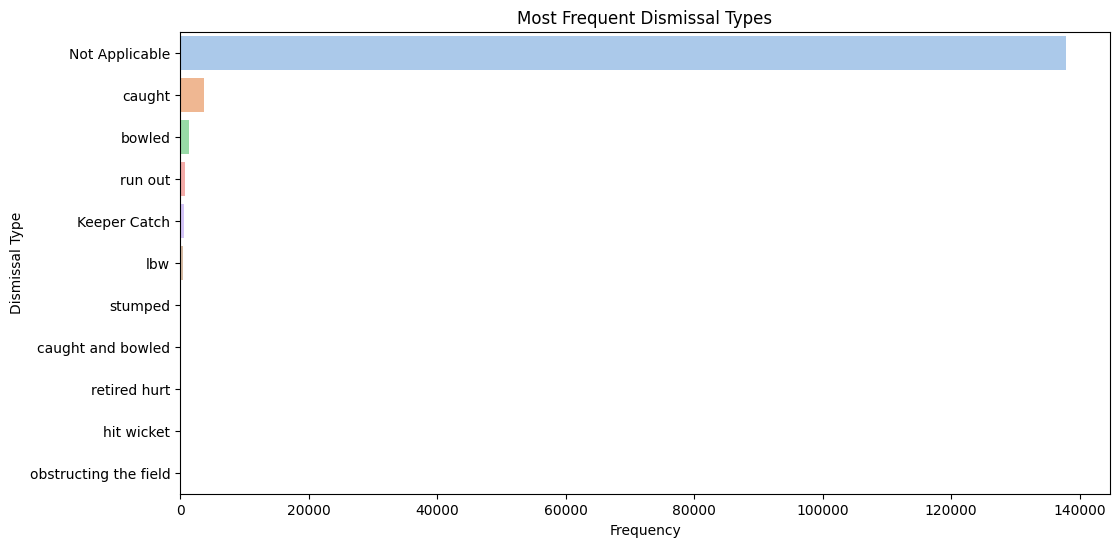

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

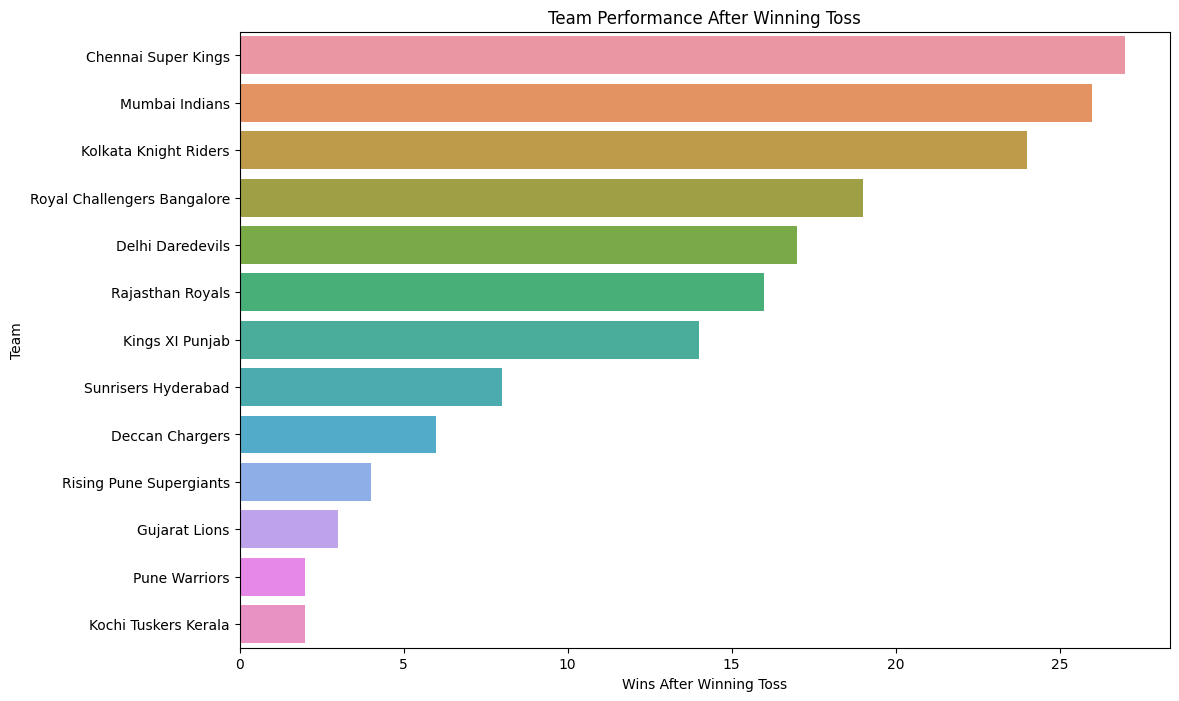

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()